In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./market-stat.csv") #loading the csv file
df['DATE'] =  pd.to_datetime(df['DATE'], infer_datetime_format=True)

In [3]:
df=df[df.SYMBOL=='NTC']#choosing stock symbol

In [5]:
df.shape

(2640, 8)

In [7]:
df.to_csv('NTC.csv', encoding='utf-8', index=False)

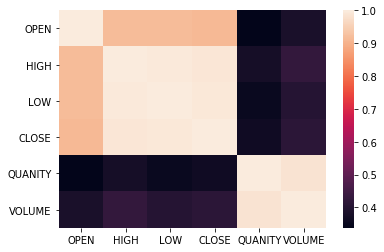

In [5]:
# building the correlation matrix
sns.heatmap(df.corr())

In [6]:
df.head()

,DATE,SYMBOL,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME
1,2020-03-22,NTC,622.0,632.0,610.0,623.0,275,168765
3,2020-03-19,NTC,605.0,617.0,600.0,610.0,33369,20166504
5,2020-03-18,NTC,615.0,615.0,600.0,605.0,16277,9847086
7,2020-03-17,NTC,632.0,632.0,607.0,609.0,27730,16901593
9,2020-03-16,NTC,625.0,626.0,610.0,620.0,14334,8859338


In [5]:
#rearrange column
ntc=df.reindex(columns= ['DATE', 'SYMBOL', 'OPEN','HIGH','LOW','QUANITY','VOLUME','CLOSE'])

In [8]:
ntc.head()

,DATE,SYMBOL,OPEN,HIGH,LOW,QUANITY,VOLUME,CLOSE
1,2020-03-22,NTC,622.0,632.0,610.0,275,168765,623.0
3,2020-03-19,NTC,605.0,617.0,600.0,33369,20166504,610.0
5,2020-03-18,NTC,615.0,615.0,600.0,16277,9847086,605.0
7,2020-03-17,NTC,632.0,632.0,607.0,27730,16901593,609.0
9,2020-03-16,NTC,625.0,626.0,610.0,14334,8859338,620.0


In [18]:
ntc.index = pd.to_datetime(ntc['DATE'])
ntc = ntc.drop(['DATE'], axis = 1)

In [19]:
ntc.head()

,SYMBOL,OPEN,HIGH,LOW,QUANITY,VOLUME,CLOSE
DATE,,,,,,,
2020-03-22,NTC,622.0,632.0,610.0,275,168765,623.0
2020-03-19,NTC,605.0,617.0,600.0,33369,20166504,610.0
2020-03-18,NTC,615.0,615.0,600.0,16277,9847086,605.0
2020-03-17,NTC,632.0,632.0,607.0,27730,16901593,609.0
2020-03-16,NTC,625.0,626.0,610.0,14334,8859338,620.0


In [21]:
ntc.dtypes

SYMBOL      object
OPEN       float64
HIGH       float64
LOW        float64
QUANITY      int64
VOLUME       int64
CLOSE      float64
dtype: object

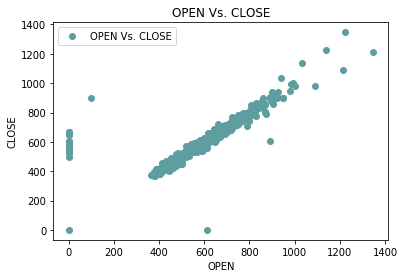

In [22]:
# define the x & y data.
x = ntc['OPEN']
y = ntc['CLOSE']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'OPEN Vs. CLOSE')

# make sure it's formatted.
plt.title("OPEN Vs. CLOSE")
plt.xlabel("OPEN")
plt.ylabel("CLOSE")
plt.legend()

plt.show()

In [23]:
# let's measure that correlation
ntc.corr()

,OPEN,HIGH,LOW,QUANITY,VOLUME,CLOSE
OPEN,1.000000,0.919714,0.919260,0.337775,0.383560,0.912759
HIGH,0.919714,1.000000,0.995534,0.374230,0.426791,0.991492
LOW,0.919260,0.995534,1.000000,0.355297,0.404693,0.992290
QUANITY,0.337775,0.374230,0.355297,1.000000,0.984964,0.364276
VOLUME,0.383560,0.426791,0.404693,0.984964,1.000000,0.413859
CLOSE,0.912759,0.991492,0.992290,0.364276,0.413859,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D6094B48>,
      dtype=object)

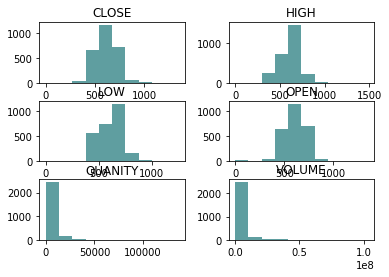

In [24]:
ntc.hist(grid = False, color = 'cadetblue')


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# define our input variable (X) & output variable.
Y = ntc.drop(['OPEN','HIGH','LOW','QUANITY','VOLUME','CLOSE'], axis = 1)
X = ntc[['OPEN','HIGH','LOW','QUANITY','VOLUME','CLOSE']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [40]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'NTC'

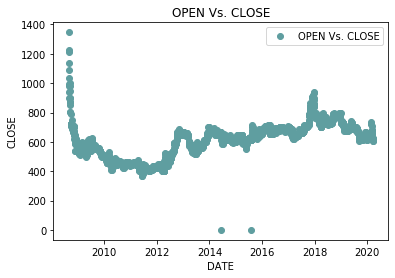

In [42]:
# define the x & y data.
x = ntc.index
y = ntc['CLOSE']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'OPEN Vs. CLOSE')

# make sure it's formatted.
plt.title("OPEN Vs. CLOSE")
plt.xlabel("DATE")
plt.ylabel("CLOSE")
plt.legend()

plt.show()

In [43]:
ntc.describe()

,OPEN,HIGH,LOW,QUANITY,VOLUME,CLOSE
count,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000
mean,607.369515,616.100322,604.701390,5102.347727,3.481343e+06,610.395652
std,124.166651,116.521577,112.059467,8985.774177,6.940992e+06,114.576808
min,0.000000,0.000000,0.000000,4.000000,2.440000e+03,0.000000
25%,529.500000,535.000000,526.000000,1180.000000,6.248688e+05,530.000000
50%,635.000000,639.000000,625.000000,2557.500000,1.511050e+06,634.000000
75%,682.000000,689.000000,677.000000,5531.250000,3.637839e+06,682.000000
max,1347.000000,1481.000000,1249.000000,136420.000000,1.030491e+08,1347.000000


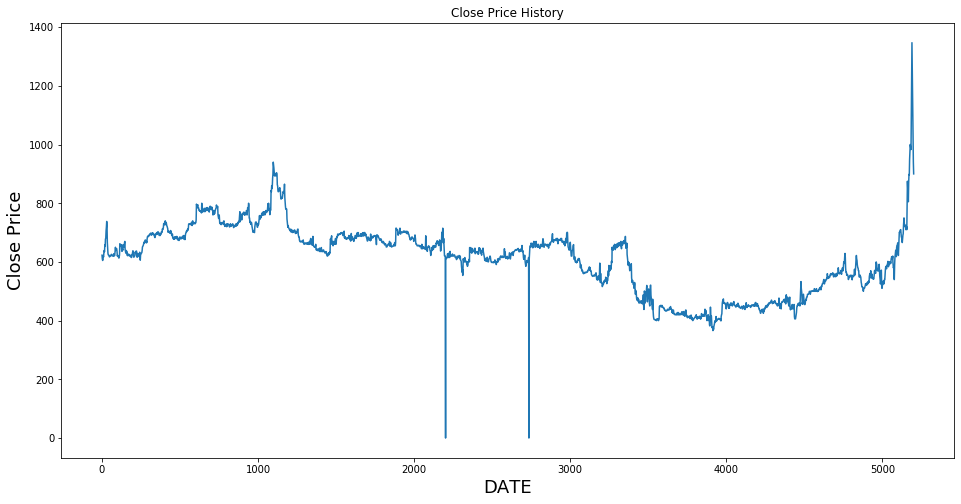

In [45]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['CLOSE'])
plt.xlabel('DATE',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

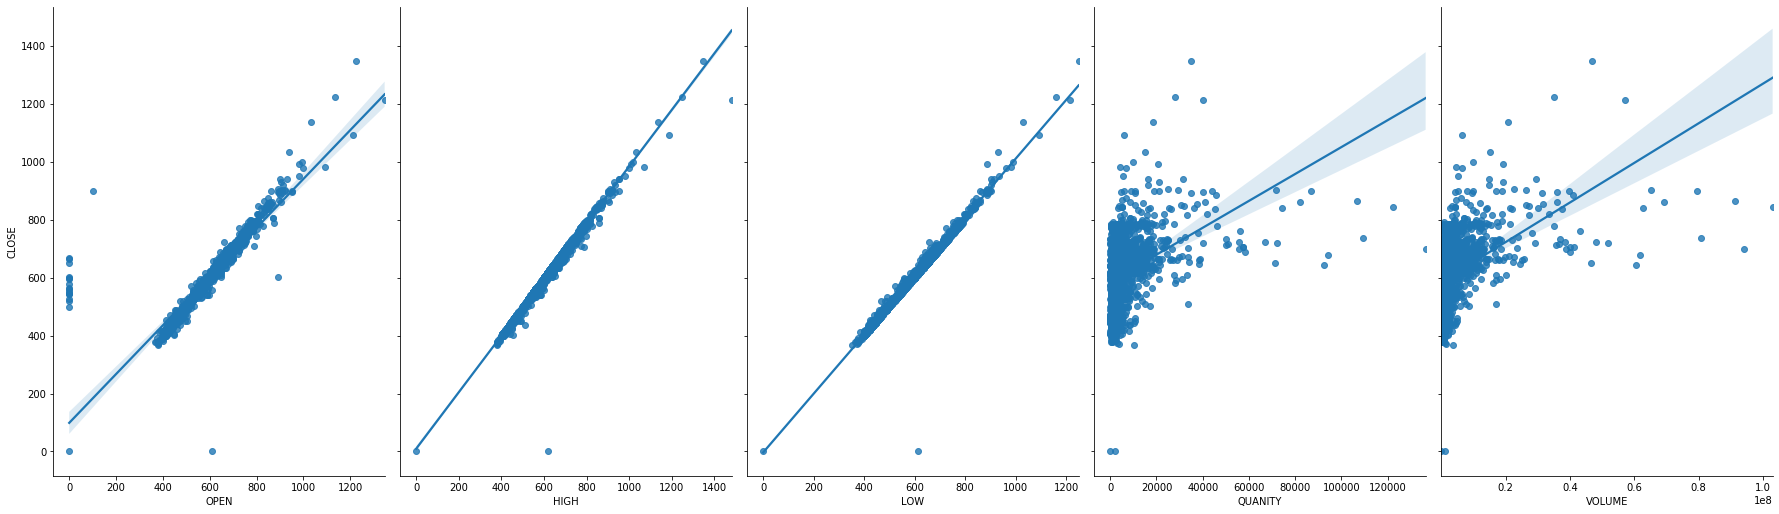

In [48]:
sns.pairplot(df,x_vars=['OPEN','HIGH','LOW','QUANITY','VOLUME'],y_vars='CLOSE',height=7,aspect=0.7,kind='reg')

In [13]:
ntc['YEAR'] = ntc['DATE'].dt.year

In [26]:
ntc=ntc.reindex(columns= ['DATE', 'YEAR','MONTH','SYMBOL', 'OPEN','HIGH','LOW','QUANITY','VOLUME','CLOSE'])

In [14]:
ntc['MONTH'] = ntc['DATE'].dt.month

In [27]:
ntc.head()

,DATE,YEAR,MONTH,SYMBOL,OPEN,HIGH,LOW,QUANITY,VOLUME,CLOSE
1,2020-03-22,2020,3,NTC,622.0,632.0,610.0,275,168765,623.0
3,2020-03-19,2020,3,NTC,605.0,617.0,600.0,33369,20166504,610.0
5,2020-03-18,2020,3,NTC,615.0,615.0,600.0,16277,9847086,605.0
7,2020-03-17,2020,3,NTC,632.0,632.0,607.0,27730,16901593,609.0
9,2020-03-16,2020,3,NTC,625.0,626.0,610.0,14334,8859338,620.0


In [28]:
ntc.to_csv('NTC-year-mon.csv', encoding='utf-8', index=False)